In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
data = pd.read_csv('training_c.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,72.0,98,86.0,high risk
1,35.0,140,90.0,72.0,98,70.0,high risk
2,29.0,90,70.0,72.0,100,80.0,high risk
3,30.0,140,85.0,72.0,98,70.0,high risk
4,35.0,120,60.0,61.0,98,76.0,low risk
...,...,...,...,...,...,...,...
1004,48.0,120,80.0,72.0,98,88.0,high risk
1005,22.0,120,60.0,72.0,98,80.0,high risk
1006,55.0,120,90.0,72.0,98,60.0,high risk
1007,35.0,85,60.0,72.0,98,86.0,high risk


Importiamo i classificatori progettati manualmente nello step 1

In [86]:
import functions

In questo step utilizziamo scikit learn solo per standardizzare i dati e dividere il dataset in training set e test set

In [87]:

# Divisione in training e test
X = data.drop("RiskLevel", axis=1)  # Separa le colonne contenenti le feature (escludendo "RiskLevel")
y = data['RiskLevel']  # Estrai la colonna target ("RiskLevel")

# Utilizzo di train_test_split per suddividere il dataset in training (80%) e test (20%)
# 'stratify=y' assicura che la distribuzione delle classi nel target sia mantenuta nei due set
# 'random_state=42' rende la divisione riproducibile
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardizzazione dei dati
scaler = StandardScaler()  # Crea un oggetto per la standardizzazione
X_train = scaler.fit_transform(X_train)  # Calcola la media e la deviazione standard su X_train, poi applica la trasformazione
X_test = scaler.transform(X_test)  # Utilizza i parametri di X_train (media e deviazione) per standardizzare X_test

# Convertiamo y_train e y_test in array numpy
y_train = np.array(y_train)  # Converte la serie pandas y_train in un array numpy
y_test = np.array(y_test)  # Converte la serie pandas y_test in un array numpy



Quindi abbiamo il Training set (X_train, y_train) che è utilizzato per addestrare il modello. Il Test set (X_test, y_test) è utilizzato per valutare le prestazioni del modello.


y_pred contiene le predizioni sul set di test fatte dal classificatore.
Invece y_train contiene le etichette del set di training.

<h1> KNN

Utilizziamo adesso il nostro classificatore KNN implementato nello step 1

In [88]:
# Trova il miglior valore di k usando cross-validation
k_values = list(range(1, 11))  # Prova k da 1 a 10
best_k = find_best_k(X_train, y_train, k_values, num_folds=5)  # Cross-validation a 5 fold

# Predizione di y_test con il miglior valore di k
y_pred = knn_predict(X_train, y_train, X_test, best_k)

# Calcolo e stampa dell'accuratezza finale
final_accuracy = np.mean(y_pred == y_test)
print(f'Accuratezza finale sui dati di test (con k={best_k}): {final_accuracy:.4f}')



Accuracy for k=1: 0.7839
Accuracy for k=2: 0.7839
Accuracy for k=3: 0.6969
Accuracy for k=4: 0.7019
Accuracy for k=5: 0.7019
Accuracy for k=6: 0.7242
Accuracy for k=7: 0.6820
Accuracy for k=8: 0.7019
Accuracy for k=9: 0.6745
Accuracy for k=10: 0.6944
Miglior valore di k: 1 con un'accuratezza di 0.7839
Accuratezza finale sui dati di test (con k=1): 0.8465


Usiamo la funzione per calcolare la matrice di confusione 

Possiamo anche vedere la matrice di confusione graficamente con scikit learn

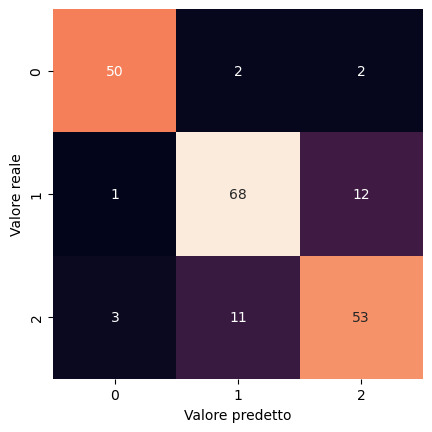

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square = True, annot= True, cbar= False)
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale");

<h1> Gaussian Naive Bayes